In [96]:
import numpy as np
import cv2
import PIL.Image as Image
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras
from keras import layers
from keras.models import Sequential

In [97]:
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

In [98]:
IMAGE_SHAPE+(3,)

(224, 224, 3)

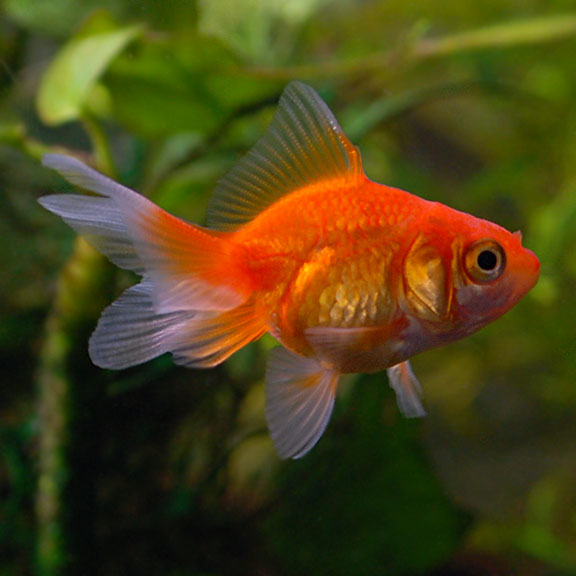

In [99]:
Image.open('goldfish.jpg')

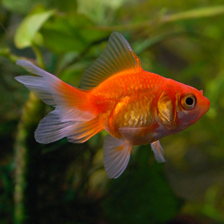

In [100]:
gold_fish = Image.open('goldfish.jpg').resize(IMAGE_SHAPE)
gold_fish

In [101]:
gold_fish = np.array(gold_fish) / 255.0
gold_fish.shape

(224, 224, 3)

In [102]:
gold_fish

array([[[0.28235294, 0.33333333, 0.07058824],
        [0.31372549, 0.37254902, 0.09019608],
        [0.34901961, 0.41960784, 0.11764706],
        ...,
        [0.32941176, 0.39215686, 0.00392157],
        [0.32156863, 0.38431373, 0.00392157],
        [0.30980392, 0.36862745, 0.        ]],

       [[0.28627451, 0.33333333, 0.08235294],
        [0.3254902 , 0.38039216, 0.10980392],
        [0.35294118, 0.42352941, 0.12941176],
        ...,
        [0.32156863, 0.38039216, 0.00392157],
        [0.31372549, 0.37254902, 0.00392157],
        [0.30196078, 0.36078431, 0.        ]],

       [[0.28627451, 0.33333333, 0.08627451],
        [0.31372549, 0.36862745, 0.10196078],
        [0.34509804, 0.41568627, 0.12941176],
        ...,
        [0.31764706, 0.37647059, 0.00392157],
        [0.30980392, 0.36862745, 0.00784314],
        [0.29803922, 0.35686275, 0.00392157]],

       ...,

       [[0.05490196, 0.10980392, 0.01568627],
        [0.05098039, 0.11372549, 0.01960784],
        [0.05098039, 0

In [103]:
gold_fish[np.newaxis,...].shape

(1, 224, 224, 3)

In [104]:
result = classifier.predict(gold_fish[np.newaxis,...])
result.shape

1/1 [==============================] - 2s 2s/step


(1, 1001)

In [105]:
result

array([[ 0.22101435,  2.04749   ,  9.622563  , ..., -1.4621586 ,
        -0.28146598, -0.25984758]], dtype=float32)

In [106]:
result.shape

(1, 1001)

In [107]:
predicted_label_index = np.argmax(result)
predicted_label_index

2

In [108]:
with open('ImageNetLabels.txt','r') as f:
    image_labels = f.read().splitlines()
image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [109]:
image_labels[predicted_label_index]

'goldfish'

In [110]:
data_dir = tf.keras.utils.get_file('flower_photos', origin='datasets',  cache_dir='.', untar=True)

In [111]:
data_dir

'.\\datasets\\flower_photos'

In [112]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [113]:
list(data_dir.glob('*/*.jpg'))

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/102841525_bd6628ae3c.jpg'),
 WindowsPath('datasets/flower_photos/daisy/1031799732_e7f4008c03.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10391248763_1d16681106_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437754174_22ec990b77_m.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437770546_8bb6f7bdd3_m.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437929963_bc13eebe0c.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10466290366_cc72e33532.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10466558316_a7198b87e2.jpg'),
 WindowsPath('datasets/flower_photos/daisy/1

In [114]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [115]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

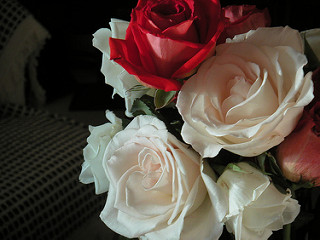

In [116]:
Image.open(str(roses[1]))

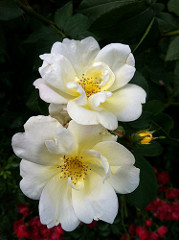

In [117]:
Image.open(str(roses[0]))

In [118]:
flower_images_dict = {
    'roses':list(data_dir.glob('roses/*')),
    'daisy':list(data_dir.glob('daisy/*')),
    'danidelion':list(data_dir.glob('sunflower/*')),
    'sunflowers':list(data_dir.glob('sunflowers/*')),
    'tulips':list(data_dir.glob('tulips/*')),
}

In [119]:
flower_images_dict['roses']

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/11102341464_508d558dfc_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/11233672494_d8bf0a3dbf_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/11694025703_9a906fedc1_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/118974357_0faa23cce9_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/11944957684_2cc806276e.jpg'),
 WindowsPath('datasets/flower_photos/roses/12045735155_42547ce4e9_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/12165480946_c4a3fe182d_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/12202373204_34fb07205b.jpg'),
 WindowsPath('datasets/flower_photos/

In [120]:
flowers_labels_dict = {
    'roses':0,
    'daisy':1,
    'dandelion':2,
    'sunflowers':3,
    'tulips':4
}

In [121]:
str(flower_images_dict['roses'][0])

'datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [122]:
img = cv2.imread(str(flower_images_dict['roses'][0]))
img.shape

(240, 179, 3)

In [123]:
cv2.resize(img,IMAGE_SHAPE).shape

(224, 224, 3)

In [124]:
x, y = [], []

for flower_name, images in flower_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        x.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [125]:
x[0]

array([[[ 0, 15,  6],
        [ 0, 15,  6],
        [ 0, 16,  7],
        ...,
        [24, 51, 31],
        [25, 52, 32],
        [26, 53, 33]],

       [[ 8, 22, 14],
        [ 8, 22, 14],
        [ 7, 21, 14],
        ...,
        [21, 47, 31],
        [24, 49, 34],
        [25, 51, 35]],

       [[12, 22, 15],
        [12, 22, 15],
        [11, 22, 14],
        ...,
        [21, 43, 31],
        [24, 46, 33],
        [26, 48, 36]],

       ...,

       [[17, 29, 25],
        [14, 25, 20],
        [13, 22, 15],
        ...,
        [ 2, 11,  2],
        [ 0,  7,  1],
        [ 0,  4,  0]],

       [[19, 30, 28],
        [18, 28, 25],
        [16, 25, 19],
        ...,
        [ 2, 10,  2],
        [ 1,  8,  2],
        [ 0,  7,  2]],

       [[ 9, 19, 19],
        [15, 23, 22],
        [19, 27, 24],
        ...,
        [ 1, 11,  2],
        [ 2, 10,  3],
        [ 3, 11,  4]]], dtype=uint8)

In [126]:
x[0]/255

array([[[0.        , 0.05882353, 0.02352941],
        [0.        , 0.05882353, 0.02352941],
        [0.        , 0.0627451 , 0.02745098],
        ...,
        [0.09411765, 0.2       , 0.12156863],
        [0.09803922, 0.20392157, 0.1254902 ],
        [0.10196078, 0.20784314, 0.12941176]],

       [[0.03137255, 0.08627451, 0.05490196],
        [0.03137255, 0.08627451, 0.05490196],
        [0.02745098, 0.08235294, 0.05490196],
        ...,
        [0.08235294, 0.18431373, 0.12156863],
        [0.09411765, 0.19215686, 0.13333333],
        [0.09803922, 0.2       , 0.1372549 ]],

       [[0.04705882, 0.08627451, 0.05882353],
        [0.04705882, 0.08627451, 0.05882353],
        [0.04313725, 0.08627451, 0.05490196],
        ...,
        [0.08235294, 0.16862745, 0.12156863],
        [0.09411765, 0.18039216, 0.12941176],
        [0.10196078, 0.18823529, 0.14117647]],

       ...,

       [[0.06666667, 0.11372549, 0.09803922],
        [0.05490196, 0.09803922, 0.07843137],
        [0.05098039, 0

In [127]:
x = np.array(x)
y = np.array(y)

In [128]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0,test_size=0.2)

In [129]:
x_train = x_train / 255
x_test = x_test / 255

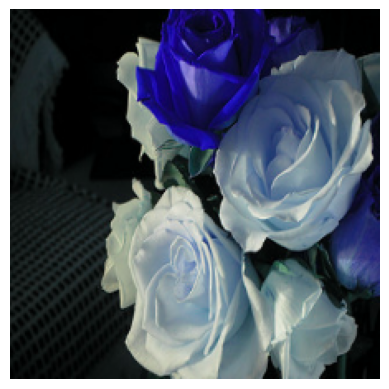

In [130]:
plt.axis('off')
plt.imshow(x[1])

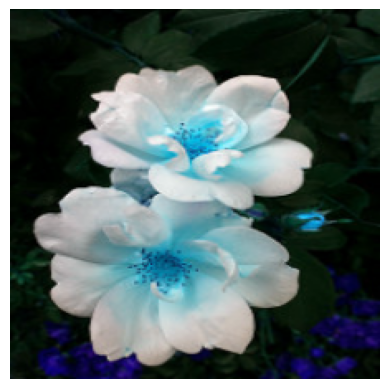

In [131]:
plt.axis('off')
plt.imshow(x[0])

In [132]:
predicted = classifier.predict(np.array([x[0],x[1],x[2]]))
predicted = np.argmax(predicted,axis=1)
predicted

1/1 [==============================] - 3s 3s/step


array([795, 880, 795], dtype=int64)

In [133]:
image_labels[880]

'umbrella'

In [134]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [135]:
num_of_flowers = 5

model = tf.keras.Sequential([
    pretrained_model_without_top_layer,
    tf.keras.layers.Dense(num_of_flowers)
])

In [136]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['acc']
)

model.fit(x_train,y_train,epochs=5)

Epoch 1/5
70/70 [==============================] - 99s 1s/step - loss: 0.8277 - acc: 0.6779
Epoch 2/5
70/70 [==============================] - 98s 1s/step - loss: 0.3967 - acc: 0.8588
Epoch 3/5
70/70 [==============================] - 102s 1s/step - loss: 0.3069 - acc: 0.8949
Epoch 4/5
70/70 [==============================] - 87s 1s/step - loss: 0.2606 - acc: 0.9220
Epoch 5/5
70/70 [==============================] - 95s 1s/step - loss: 0.2264 - acc: 0.9337


In [137]:
model.evalute(x_test,y_test)

AttributeError: 'Sequential' object has no attribute 'evalute'